In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/MyDrive/kaggle'

In [2]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [3]:
!kaggle datasets download -d karthickveerakumar/salary-data-simple-linear-regression

salary-data-simple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn

In [5]:
df=pd.read_csv("/content/drive/MyDrive/kaggle/salary-data-simple-linear-regression.zip")

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.shape

(30, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


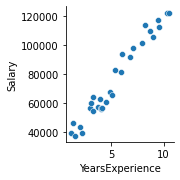

In [10]:
sns.pairplot(data=df,x_vars="YearsExperience",y_vars="Salary")

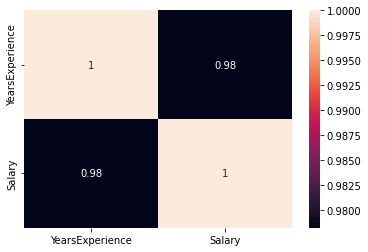

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
X=df['YearsExperience']
y=df['Salary']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.7, test_size = 0.3)


In [14]:
X_train.shape

(21,)

In [15]:
X_test.shape

(9,)

In [16]:
y_train.shape

(21,)

In [17]:
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(lm.coef_)
print(lm.intercept_)

[9588.34492913]
24940.627030612908


In [21]:
y_train_predict=lm.predict(X_train_lm)

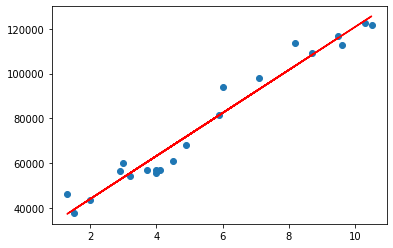

In [22]:
plt.scatter(X_train_lm,y_train)
plt.plot(X_train_lm,	y_train_predict,'r')


In [23]:
res=y_train-y_train_predict

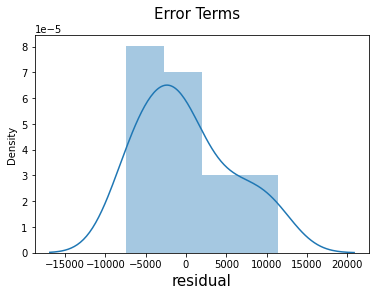

In [24]:
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('residual', fontsize = 15)        
plt.show()

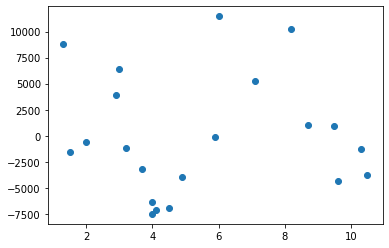

In [25]:
plt.scatter(X_train,res)

In [26]:
y_test_predict=lm.predict(X_test_lm)

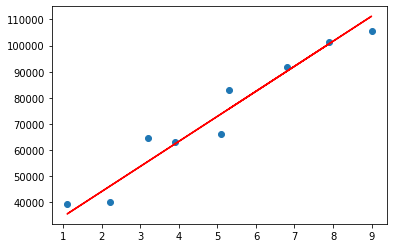

In [27]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_predict,'r')

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
score_test=r2_score(y_true=y_test,y_pred=y_test_predict)
score_train=r2_score(y_true=y_train,y_pred=y_train_predict)

In [33]:
print(score_train )
print(score_test)

0.9608110541201494
0.9410144273061659
